# Assignment
**Rationale** This dataset includes all TripAdvisor reviews written in 2015 (through part of 2016) for high review volume Vegas resorts and was collected as part of a large web crawl of over 50 Million online reviews at over 428k worldwide hotels. 

* [Dataset](https://drive.google.com/drive/folders/1nUIOHqvOoF5EkST8u_pMcL7gvKtCy0La?usp=sharing)
    * `vegas2015reviews.csv` contains the reviews 
    * `vegas_venue_info.csv` contains a list of venues in Vegas
    * Note that `gd` is the venue ID in both datasets

**Instructions: Please open this notebook in google colab and once you have completed the assignment, press share on the top right. Make available for anyone with a link. Then send the link to: y.bart@northeastern.edu and govergoor@saunders.rit.edu. Briefly describe how much time it took and what difficulties you encountered.**

# Problem 1: Sentiment Analysis 

## First, let's get to know the dataset.

1. Read in the vegas reviews dataset (call this `df`)
1. Convert any columns that look like dates into Pandas datetime columns.
1. Read in the venue info dataset and merge it with the reviews dataset. (call the resulting dataframe `df`, i.e. write over the old `df`)

Answer the following for the resulting merged dataframe, `df`:
1. How many reviews are there?
1. How many unique hotels are there? Note `gd` is the ID variable for hotels on TripAdvisor.
1. What are the unique types of travel categories?
1. Plot a histogram of the review ratings. How would you describe the overall review ratings on TripAdvisor for Vegas resorts?

## Sentiment 

Use `TextBlob` library to compute the polarity and subjectivity of every review.

1. Compare the histogram of review polarity with review ratings. How are they different? What might you conclude based on this difference about how people rate and how people write?
1. To what degree are polarity and subjectivity correlated with ratings?
1. Use a groupby + corr() statement to calculate the correlation between review ratings and polarity by travel category. In which categories are review polarity most and least correlated with ratings? Any explanation for this relationship?

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Sairaghav1999/YELP/master/vegas2015reviews.csv")
df1=pd.read_csv("https://raw.githubusercontent.com/Sairaghav1999/YELP/master/vegas_vinfo.csv")

In [ ]:
df.head()
print(df.shape)
#df.info()

(46644, 16)


In [ ]:
display(df.describe())

,Unnamed: 0,helpful_num,mgrRspnDummy,review_id,reviewrating,stay_month,stay_year
count,46644.000000,23576.000000,46644.000000,4.664400e+04,46644.000000,44649.000000,44649.000000
mean,443901.617636,1.960680,0.535053,2.648110e+08,4.036210,4.290802,2014.874219
std,284581.395057,1.682907,0.498775,1.074184e+07,1.122418,2.669854,0.331674
min,15044.000000,1.000000,0.000000,2.467659e+08,1.000000,1.000000,2013.000000
25%,206112.750000,1.000000,0.000000,2.555541e+08,3.000000,2.000000,2015.000000
50%,376729.500000,1.000000,1.000000,2.645342e+08,4.000000,4.000000,2015.000000
75%,775620.750000,2.000000,1.000000,2.737157e+08,5.000000,5.000000,2015.000000
max,904262.000000,54.000000,1.000000,2.857489e+08,5.000000,12.000000,2015.000000


In [ ]:
df.isnull().sum()

Unnamed: 0             0
gd                     0
helpful_num        23068
location            6872
mgrRspnDummy           0
mgr_res_date       21687
mrtext              2424
ratingDate             0
review_id              0
reviewrating           0
reviewtext             0
reviewtitle            0
stay_month          1995
stay_year           1995
travel_category     1995
username             951
dtype: int64

In [ ]:
df.apply(lambda x: len(x.unique()))

Unnamed: 0         46644
gd                    34
helpful_num           30
location           12002
mgrRspnDummy           2
mgr_res_date         185
mrtext             26969
ratingDate           186
review_id          46644
reviewrating           5
reviewtext         46642
reviewtitle        36690
stay_month            13
stay_year              4
travel_category        6
username           37000
dtype: int64

In [ ]:
df['mgr_res_date']=pd.to_datetime(df['mgr_res_date'],errors='ignore')
df['ratingDate']=pd.to_datetime(df['ratingDate'],errors='ignore')

In [ ]:
#df.head()
#df.info()
#df.loc[df['gd']=='g45963-d496876']

In [ ]:
#df1.shape
#df.gd.value_counts()

In [ ]:
#df1.isnull().sum()

In [ ]:
#df1.apply(lambda x: len(x.unique()))

In [ ]:
df1

,Unnamed: 0,ranking,rating_vol,rdetails,lnglat,rsubrating,vtype,amenities,details,v_name,rating_cat,gd
0,0,"[10, 33]",60.0,NaN,"[-115.06332, 36.1191]",{},Hotel_Review,{'Services': 'Free Parking Banquet Room Self-S...,"{'Number of rooms:': '398 ', 'Address:': '3890...",Las Vegas RV Resort,4.0,g45963-d3600552
1,1,"[209, 267]",63.0,NaN,"[-115.08308, 36.127922]",{},Hotel_Review,{'Things to do': 'Pool Fitness Center with Gym...,"{'Address:': '4240 Boulder Hwy, Las Vegas, NV ...",Crossland Economy Studios - Las Vegas - Boulde...,2.5,g45963-d97850
2,2,"[197, 267]",100.0,NaN,"[-115.19604, 36.20166]",{},Hotel_Review,"{'Room types': 'Non-Smoking Rooms ', 'Services...","{'Address:': '2400 N Rancho Dr, Las Vegas, NV ...",Fiesta Rancho Hotel and Casino,2.5,g45963-d121329
3,3,"[228, 267]",27.0,NaN,"[-115.19868, 36.201473]",{},Hotel_Review,"{'Things to do': 'Pool ', 'About the property'...",{'Also Known As:': 'Budget Suites Of America N...,Budget Suites of America North Rancho Drive,1.5,g45963-d91750
4,4,"[1, 33]",271.0,NaN,"[-115.1785, 36.040703]",{},Hotel_Review,{'Services': 'Self-Serve Laundry Free Parking ...,{'Also Known As:': 'Oasis Las Vegas Rv Hotel L...,Oasis Las Vegas RV Resort,4.5,g45963-d226809
...,...,...,...,...,...,...,...,...,...,...,...,...
232,232,"[26, 267]",1965.0,NaN,"[-115.17187, 36.11503]",{},Hotel_Review,{'Things to do': 'Pool Restaurant Bar/Lounge C...,"{'Address:': '3595 Las Vegas Boulevard South, ...",The Cromwell,4.5,g45963-d6537691
233,233,"[47, 267]",3007.0,NaN,"[-115.195, 36.11422]",{},Hotel_Review,{'Things to do': 'Fitness Center with Gym / Wo...,"{'Address:': '4321 West Flamingo Road, Las Veg...",Palms Casino Resort,4.0,g45963-d208820
234,234,"[100, 267]",546.0,NaN,"[-115.14454, 36.1732]",{},Hotel_Review,{'Things to do': 'Pool Restaurant Casino and G...,"{'Address:': '12 E Ogden Ave, Las Vegas, NV 89...",California Hotel,3.5,g45963-d91763
235,235,"[2, 33]",727.0,NaN,"[-115.21856, 36.113987]",{},Hotel_Review,{'Room types': 'Kitchenette Suites Non-Smoking...,"{'Address:': '5625 W Flamingo Rd, Las Vegas, N...",Westgate Flamingo Bay Resort,4.0,g45963-d234835


In [ ]:
merge_df = pd.merge(left=df,right=df1, left_on='gd', right_on='gd')
merge_df

,Unnamed: 0_x,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username,Unnamed: 0_y,ranking,rating_vol,rdetails,lnglat,rsubrating,vtype,amenities,details,v_name,rating_cat
0,15044,g45963-d1123368,NaN,"Walnut Creek, California",0,NaT,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
1,15045,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaT,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
2,15046,g45963-d1123368,NaN,Brussels,0,NaT,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
3,15047,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaT,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
4,15058,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaT,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46639,904218,g45963-d91925,3.0,"Washington DC, District of Columbia",1,2015-03-16,Thank you for your wonderful review. It is gre...,2015-03-15,259656436,5,Aria is one of the top hotels in the strip and...,“ Its worth it. ”,3.0,2015.0,solo,RexTanjuatco,230,"[14, 267]",21627.0,NaN,"[-115.17628, 36.107323]",{},Hotel_Review,{'Things to do': 'Pool Fitness Center with Gym...,"{'Address:': '3730 Las Vegas Boulevard South, ...",ARIA Resort & Casino,4.5
46640,904229,g45963-d91925,NaN,"Portland, Oregon",1,2015-03-16,"Dear Bobbi, Thank you so much for choosing ARI...",2015-03-15,259650112,5,My husband and I just returned from Aria yeste...,“ Yet Another Visit ”,3.0,2015.0,couple,Bobbi S,230,"[14, 267]",21627.0,NaN,"[-115.17628, 36.107323]",{},Hotel_Review,{'Things to do': 'Pool Fitness Center with Gym...,"{'Address:': '3730 Las Vegas Boulevard South, ...",ARIA Resort & Casino,4.5
46641,904240,g45963-d91925,NaN,MANCHESTER,1,2015-03-19,Thank you for your recommendation and sharing ...,2015-03-15,259639795,5,9 years since my last visit to Vegas & this ho...,“ 40th Birthday Trip ”,3.0,2015.0,friends,ZETAMANCHESTER,230,"[14, 267]",21627.0,NaN,"[-115.17628, 36.107323]",{},Hotel_Review,{'Things to do': 'Pool Fitness Center with Gym...,"{'Address:': '3730 Las Vegas Boulevard South, ...",ARIA Resort & Casino,4.5
46642,904251,g45963-d91925,NaN,NaN,1,2015-03-16,"Dear Ramiro, Thank you for staying at ARIA to ...",2015-03-15,259601035,5,Stayed for one night for friends birthday. Gre...,“ BEST HOTEL IN LAS VEGAS!! ”,3.0,2015.0,friends,Ramiro G,230,"[14, 267]",21627.0,NaN,"[-115.17628, 36.107323]",{},Hotel_Review,{'Things to do': 'Pool Fitness C

In [ ]:
merge_df['reviewtext'].isnull().sum()

0

In [ ]:
merge_df.apply(lambda x: len(x.unique()))

Unnamed: 0_x       46644
gd                    34
helpful_num           30
location           12002
mgrRspnDummy           2
mgr_res_date         185
mrtext             26969
ratingDate           186
review_id          46644
reviewrating           5
reviewtext         46642
reviewtitle        36690
stay_month            13
stay_year              4
travel_category        6
username           37000
Unnamed: 0_y          34
ranking               33
rating_vol            34
rdetails               1
lnglat                34
rsubrating             1
vtype                  1
amenities             34
details               34
v_name                34
rating_cat             3
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

5    20883
4    13761
3     6985
2     2836
1     2179
Name: reviewrating, dtype: int64
46644


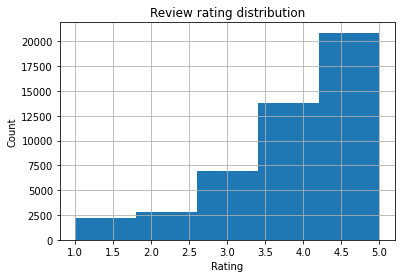

In [ ]:
merge_df['reviewrating'].hist(bins=5).plot()
plt.title("Review rating distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
print(merge_df['reviewrating'].value_counts())
print(len(merge_df))

In [ ]:
from textblob import TextBlob

In [ ]:
merge_df_arr = merge_df.to_numpy()

In [ ]:
merge_df_arr[11]

array([15124, 'g45963-d1123368', 1.0, 'San Diego, California', 0, NaT,
       nan, Timestamp('2015-06-11 00:00:00'), 279570115, 5,
       'I stayed at the Encore for 3 nights and it was spectacular. I stayed in a panoramic view suite on the 52nd floor and it was gorgeous. The attention to detail was remarkable. I enjoyed the pool (which was pretty empty, maybe because it was later in the day...) and the service was great. I needed a fridge in my room, so feel free to ask, they will cater to you. It is known for being a 5 star hotel and it definitely met those standards. Just ask the drivers of the Maybachs, Bugattis, Lamborghinis, and Corvettes that were staying there.',
       '“ Magnificent ”', 6.0, 2015.0, 'business', 'AMaik', 7, '[4, 267]',
       9453.0, nan, '[-115.164505, 36.12825]', '{}', 'Hotel_Review',
       "{'Room types': 'Suites Non-Smoking Rooms ', 'Services': 'Business Center with Internet Access Room Service Free Parking Meeting Rooms Dry Cleaning Laundry Service Conci

In [ ]:
l=len(merge_df)
polarity_arr=[]
subjectivity_arr=[]

text_corpus=""

In [ ]:
for t in merge_df["reviewtext"]:
    text_corpus=text_corpus+"."+t

In [ ]:
text_corpus[0:500]

'.An excellent property! The rooms are very nicely done, and generous in size. Service is top notch, the art throughout the property is stunning. Everyone on sight is helpful and friendly. I have stayed at several of the higher end properties in Vegas and this is as nice as I have experienced. The price was fair, but that always depends on the time of the visit. Highly recommended..My first visit to Las Vegas and WOW!! Whilst all hotels on the strip give you the WOW factor, the Wynn Encore was ju'

In [ ]:
len(text_corpus)

29204903

In [ ]:
import string
string.punctuation
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
text_nopunct=''

text_nopunct= "".join([char for char in text_corpus if char not in string.punctuation])

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [ ]:
text_tokens = tokenizer.tokenize(text_nopunct)
len(text_tokens)

5383738

In [ ]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

text_words = []

# Looping through the tokens and make them lower case
for word in text_tokens:
    text_words.append(word.lower())

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.

stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
final_words=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in text_words:
    if word not in stopwords:
        final_words.append(word)

In [ ]:
#using WordNetLemmatizer

wn = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lem_final_words=[]

for word in final_words:
    word=wn.lemmatize(word)
    lem_final_words.append(word)

In [ ]:
#The frequency distribution of the words
freq_dist_text = nltk.FreqDist(lem_final_words)

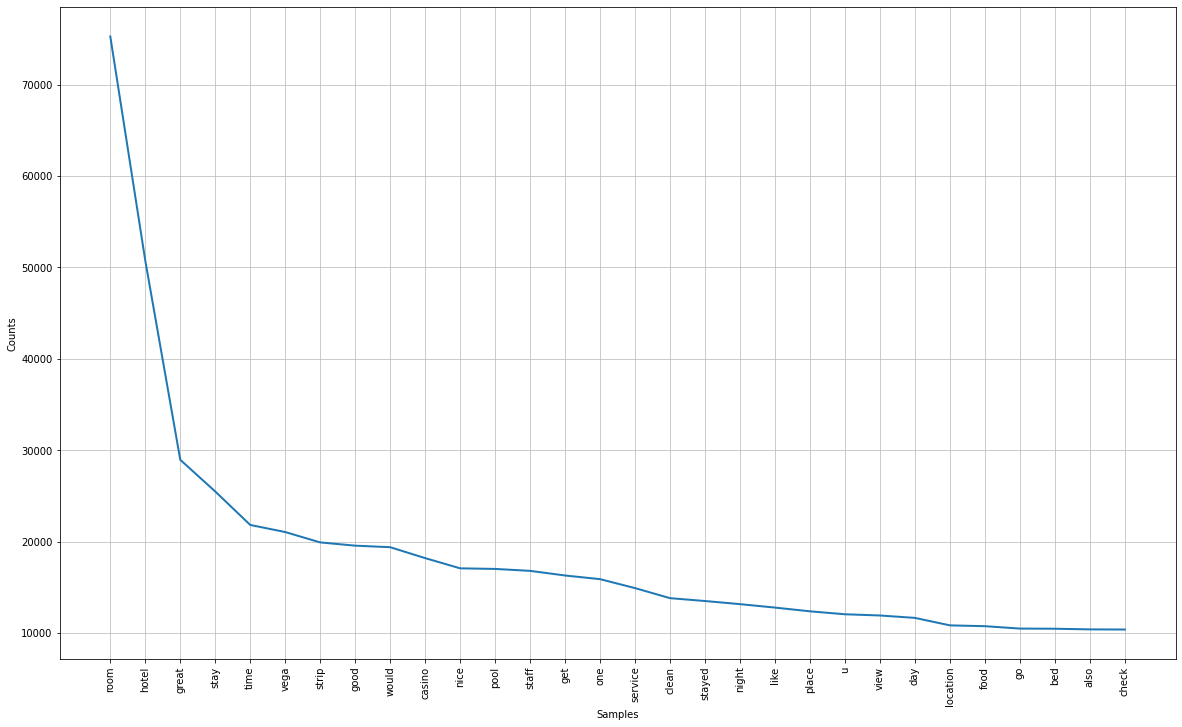

In [ ]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist_text.plot(30)

In [ ]:
res_text=' '.join([i for i in lem_final_words if not i.isdigit()])

In [ ]:
from wordcloud import WordCloud

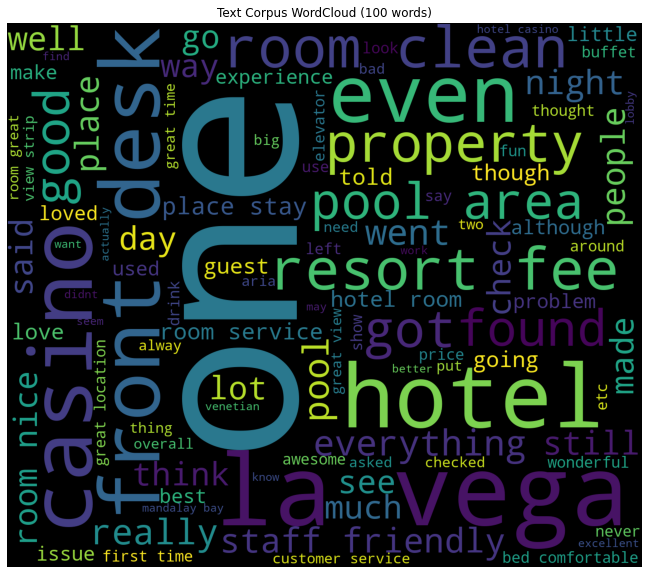

In [ ]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_text)


plt.imshow(wordcloud)
plt.title('Text Corpus WordCloud (100 words)')
plt.axis('off')
plt.show()

In [ ]:
for a in merge_df_arr:
    text=a[11]
    testimonial = TextBlob(text)
    testimonial.sentiment
    polarity_arr.append(testimonial.sentiment.polarity)
    subjectivity_arr.append(testimonial.sentiment.subjectivity)

In [ ]:
merge_df["Review_Polarity"]=polarity_arr
merge_df["Review_Subjectivity"]=subjectivity_arr

In [ ]:
merge_df.head()

,Unnamed: 0_x,gd,helpful_num,location,mgrRspnDummy,mgr_res_date,mrtext,ratingDate,review_id,reviewrating,reviewtext,reviewtitle,stay_month,stay_year,travel_category,username,Unnamed: 0_y,ranking,rating_vol,rdetails,lnglat,rsubrating,vtype,amenities,details,v_name,rating_cat,Review_Polarity,Review_Subjectivity
0,15044,g45963-d1123368,NaN,"Walnut Creek, California",0,NaT,NaN,2015-07-01,284818340,5,An excellent property! The rooms are very nice...,“At the top of its game”,6.0,2015.0,business,cadby,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.050000,0.450000
1,15045,g45963-d1123368,NaN,"Maidstone, United Kingdom",0,NaT,NaN,2015-07-01,284776986,5,My first visit to Las Vegas and WOW!! Whilst a...,“ wow!! ”,9.0,2014.0,couple,Sonia H,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.156250,1.000000
2,15046,g45963-d1123368,NaN,Brussels,0,NaT,NaN,2015-06-30,284187374,5,Some of the most beautiful hotel rooms in the ...,“ Mass market but luxery hotel at north end of...,6.0,2015.0,couple,Globaliser,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.293333,0.406667
3,15047,g45963-d1123368,NaN,"Colchester, United Kingdom",0,NaT,NaN,2015-06-13,279887884,5,"This Hotel is exceptional, its beautifully set...",“ Highlight of Vegas ”,5.0,2015.0,couple,Sharcoates,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.000000,0.000000
4,15058,g45963-d1123368,NaN,"Denver, Colorado, United States",0,NaT,NaN,2015-06-13,279841140,5,"My husband and I stayed here during a trip,to ...","“ Beautiful hotel, great location ”",6.0,2015.0,couple,Kimberly A,7,"[4, 267]",9453.0,NaN,"[-115.164505, 36.12825]",{},Hotel_Review,"{'Room types': 'Suites Non-Smoking Rooms ', 'S...","{'Address:': '3121 Las Vegas Blvd. South, Las ...",Encore At Wynn Las Vegas,4.5,0.825000,0.875000


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


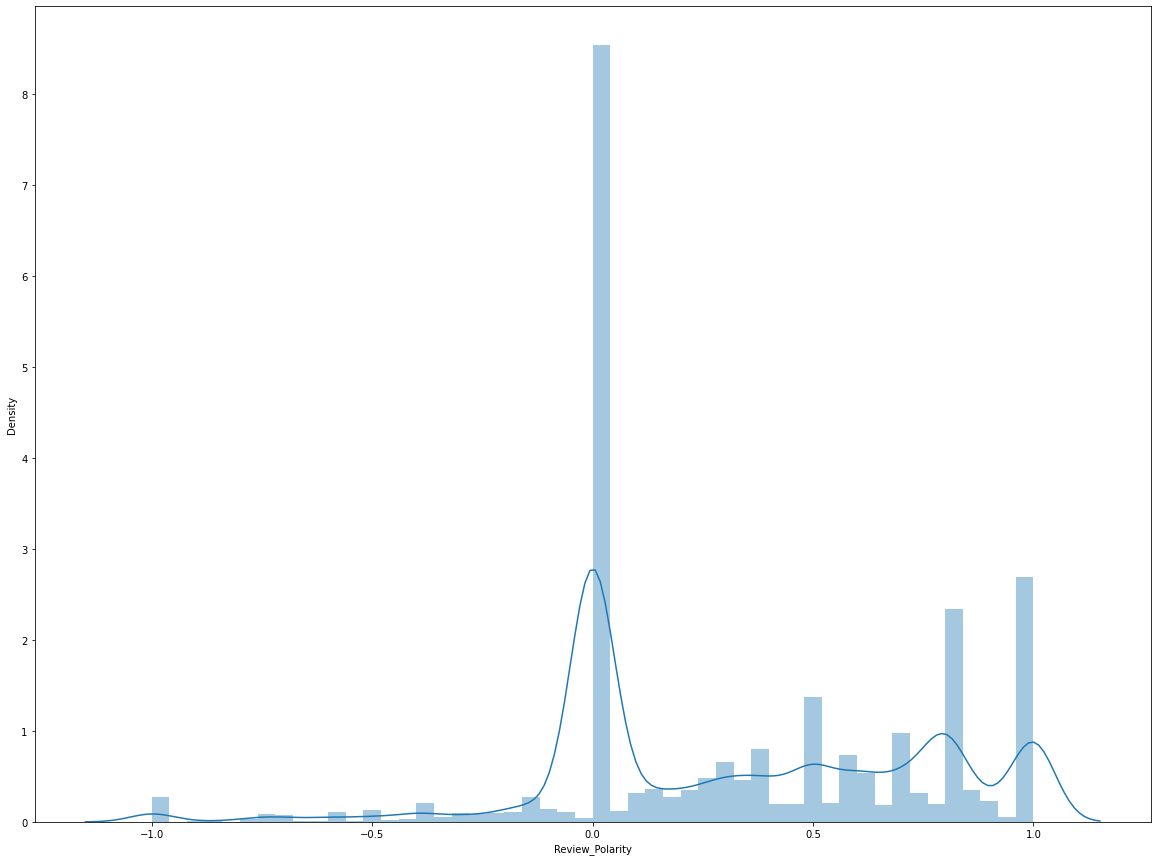

In [ ]:
plt.figure(figsize=(20,15))
sns.distplot(merge_df["Review_Polarity"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


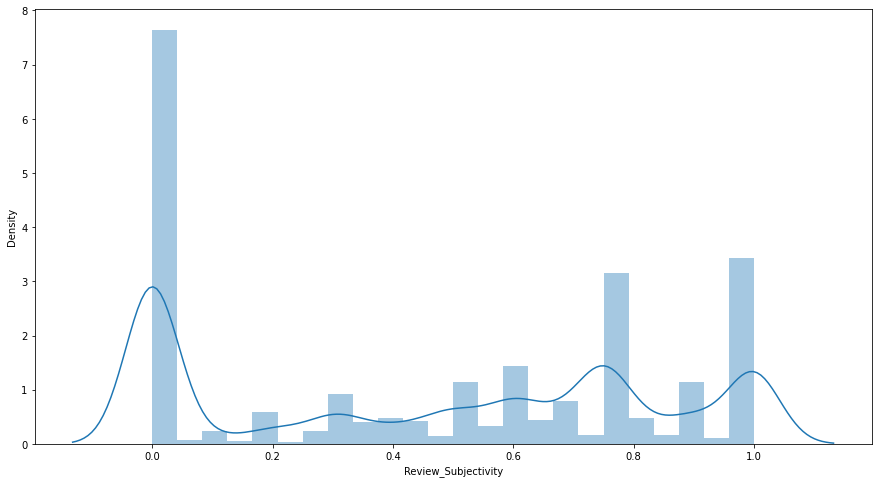

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(merge_df["Review_Subjectivity"])

In [ ]:
len(merge_df_arr)

46644

# Helper Functions

In [ ]:
import spacy, time
from gensim.models.ldamulticore import LdaMulticore # this is the multi-core version
from gensim import corpora # import the corpora module
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from sklearn.model_selection import train_test_split


def line_doc(filename, encode = 'utf-8'):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    with open(filename, 'r', encoding = encode) as f:
        for txt in f:
            # yield returns next line
            yield txt.replace('\\n', '\n')
            # and get rid of any line breaks

# parsing to be done per sentence
def lemmatize(s, exclude):
    return [w.lemma_.lower() for w in s if (w.lemma_ not in exclude)&(~w.is_punct)]
# next will be a function that will pass a filename to the line_doc function
# and generate the parsed versions of ***EVERY SENTENCE***
# this function streams a file at filename and yields one parsed sentence at a time


def lemmatize_sentence_corpus(filename,nlp, batch_size, n_threads, sw=[], exclusions=[], encode = 'utf-8'):
    nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
    # batch_size is the number of documents to parse in memory at a time
    # n_threads it the number of parallel (simultaneous processes to run)
    # n_threads is limited by the number of virtual cpu's on the system
    # the default free Colab system has only 2 virtual cores
    # most modern computers have at least 4
    exclude = set(sw + exclusions)
    for parsed_txt in nlp.pipe(line_doc(filename, encode = encode),batch_size=batch_size, n_threads=n_threads):
            for sent in parsed_txt.sents:
                yield ' '.join(lemmatize(sent, exclude))


def write_parsed_sentence_corpus(readfile, writefile, nlp, batch_size, n_threads, sw=[], exclusions =[], encode = 'utf-8'):
    streamingfile = lemmatize_sentence_corpus(readfile,nlp, batch_size, n_threads, sw=sw, exclusions=exclusions, encode = encode)
    with open(writefile, 'w', encoding = encode) as f:
        for sentence in streamingfile:
            if len(sentence)>0: # write sentence if includes non stopwords
                f.write(sentence+'\n')
    print('Success')


def phrase_detection(parsedfile, folderpath, passes = 2, returnmodels = True,threshold=10., encode = 'utf-8'):
    """
    parsedfile is the file location and name of the parsed sentence file
    folderpath is where the models and phrase detected texts need to be stored

    This function does phrase modeling. User specifies the number of passes.
    Each additional pass detects longer phrases. The maximum detectable phrase length for
    each pass, n, is 2^n.
    Returns the list of models by default. Also saves models and intermediary
    phrased sentences for each pass.
    """
    ngram = list()
    for it in range(passes):
        gen = LineSentence(parsedfile)
        gram=Phrases(gen, threshold = threshold)
        ngram.append(gram)
        modelpath = folderpath+'phrase_model_{}.phrasemodel'.format(it+1)
        textpath = folderpath+'sent_gram_{}.txt'.format(it+1)
        gram.save(modelpath)
        # Write sentence n-gram
        with open(textpath, 'w', encoding=encode) as f:
            for sent in gen:
                new_sent = ' '.join(gram[sent])
                f.write(new_sent + '\n')

    if returnmodels == True:
        return ngram


def phrase_prediction(rawfilepath, outpath,nlp, grams, sw =[], exclusions = [], batch_size = 500, n_threads = 2, encode = 'utf-8'):
    """
    rawfilepath is where the raw reviews (where 1 line = 1 review) are saved 
    outpath is where to save the resulting parsed and phrase modeled reviews
    nlp is the spacy parser object
    grams is a list of phrasemodels
    sw is a list of stopwords
    exclusions are additional words to exclude

    """
    with open(outpath, 'w', encoding = encode) as f:
        
        nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
        exclude = set(sw + exclusions)
        
        for parsed_txt in nlp.pipe(line_doc(rawfilepath, encode = encode),batch_size=batch_size, n_threads=n_threads):
            doc = list()
            for sent in parsed_txt.sents:
                parsed = lemmatize(sent, exclude)
                for gram in grams: # loop through phrase models
                    parsed = gram[parsed] # apply phrase model transformation to sentence
                doc.append(' '.join(parsed).strip()) # append resulting phrase modeled sentence to list "doc"
            # write the transformed review as a single line in the new file
            txt_gram = ' '.join(doc).strip() # join all sentences in doc together as txt_gram
            f.write(txt_gram + '\n') # write the entire phrase modeled and parsed doc as one line in file

# 2. Topics in hotel reviews 

## Preprocessing the texts (3)

In this part, you will need to borrow the functions (attached):
1. Create a folder on your google drive to save your NLP files
1. Write a file containing raw reviews.
1. Lemmatize this file into a new file of sentences.
    1. remove stopwords
    1. remove punctuation
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Apply phrase model twice to identify phrases of up to 4 words in length.
1. Go back to the raw reviews and lemmatize + apply the phrase models at the review level, write the resulting review-level (1 line = 1 review) file to your NLP folder.
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Create a column in your dataframe called "parsed" that contains the resulting parsed versions of each reviews.
    1. Be sure to save this dataframe so you don't have to start from scratch (can read it in if you come back to the assignment). 
    1. If you come back to this part, make sure that you that you don't delete the outputs from previous session.
1. List the directory of your NLP folder to show that your intermediate steps have been saved.

## LDA model (3)

Apply the LDA model to the parsed reviews 

1. Create a dictionary
1. Filter extreme words in the dictionary
1. Create a corpus of reviews where 1 document = 1 review.
1. Run the LDA for 10-70 topics (inclusive of 70), skipping 10 at a time. (go grab a coffee, this takes ~ 15 minutes)

**How many topics is best in terms of perplexity?**

### Visualize the topics. 

1. Load the best model.
1. Create an LDAVis. (remember you have to `! pip install pyldavis` first)
1. **Pick 3 topics that kind of make sense and describe what they represent.**

### Use LDA to compare pos vs neg reviewers
Imagine you are the marketing director for one of these hotels (pick one of the resorts), **what are the differences in topics mentioned by satisfied and dissatisfied customers?** 